## CNN for MNIST dataset

Using convolutional neural network to perform classification of MNIST dataset (10 handwritten numbers 0-9). 

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# load dataset

mnist = tf.keras.datasets.mnist   

In [3]:
# Split dataset into Train and Test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Check dimensions of train set
x_train.shape

(60000, 28, 28)

Output above tells us that the Train dataset is made up of 60000 samples, 28x28 pixels. (1-dimensional)

In [5]:
# Check dimensions of test set
x_test.shape

(10000, 28, 28)

In [6]:
# check the first 5 observations of the label (y)
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

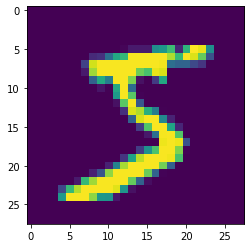

In [7]:
# View first element of x_train
plt.imshow(x_train[0])              # Show image

In [8]:
# Create the 10 label names as found in dataset
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

In [9]:
# function to connect the labels to the images

def plot_sample(x, y, index):
    plt.figure(figsize= (15, 2))       # set the size of the image
    plt.imshow(x[index])               # show image
    plt.xlabel(classes[y[index]])      # print the label of the image

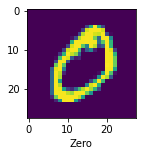

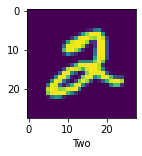

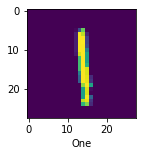

In [10]:
# View the a few of the elements:
plot_sample(x_train, y_train, 1)
plot_sample(x_train, y_train, 5)
plot_sample(x_train, y_train, 8)

We can see that the label names macth up correctly with the selected images.

In [11]:
# View array:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# Find range of elements in above array:
min_value = np.min(x_train[0])
print('min_value is: ', min_value)
max_value = np.max(x_train[0])
print('max_value is: ', max_value)

min_value is:  0
max_value is:  255


We can see the elements in the arrays. The elements are in the range of 0 to 255.

In [14]:
# Normalise data (scale data between 0-1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [15]:
# View an array:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we can see that all the elements are between 0 and 1.

In [51]:
# Design an Artificial Neural Network:

ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),      # Input layer: 28 x 28  (as per input)
        layers.Dense(128, activation='relu'),     # Hidden layer: 128 nodes. Activation used: tensorflow rectified linear unit
        layers.Dense(128, activation='relu'),     # Hidden layer: 128 nodes. Activation used: tensorflow rectified linear unit
        layers.Dense(10, activation='sigmoid')    # Output layer: 10 nodes at output (10 possible categories). Activation used: sigmoid
    ])

In [52]:
# Fit the designed ANN model to training data:

ann.compile(optimizer = 'SGD',                         # Optimiser: Stochastic gradient decent 
            loss = 'sparse_categorical_crossentropy',  # loss function: what aspect we want to minimise as model progresses
            metrics=['accuracy'])                      # we want to analyse accuracy metric

ann.fit(x_train, y_train, epochs=5)                   # epochs: how many times we want to repeat training

Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 1.6472 - accuracy: 0.5569
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4205 - accuracy: 0.8813
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3294 - accuracy: 0.9057
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.9175
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2641 - accuracy: 0.9243


The accuracy of the model increases over each run.

In [53]:
# Evaluate ANN model on Test set:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 984us/step - loss: 0.2539 - accuracy: 0.9273


[0.2538534700870514, 0.927299976348877]

The model produced an accuracy of 92.7%

### Apply Convolutional Neural Network

In [58]:
# Design a Convolutional Neural Network:

cnn = models.Sequential([                     # Convolution is detecting the features of the image
    
    # CNN  
    ### Convolutional Layer: Specifiy the number filters and the size of filter
    ### Pooling Layer: 
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),  # 32 filters, 3x3 size. Input shape 28,28,1 (1-dimension) as per input dimensions.
    layers.MaxPooling2D(2,2),         # Pool size 2x2. Pooling method chosen: Max
    
   
    # DENSE Network (The Classification part): 
    # At this part we won't need as many nodes, as the CNN would have done most of the work.
        layers.Flatten(),                         # Input layer: Shape is not required, as the network will figure it out.
        layers.Dense(8, activation='relu'),       # Hidden layer: 8 nodes. Activation used: tensorflow rectified linear unit
        layers.Dense(10, activation='softmax')    # Output layer: 10 nodes at output (10 possible categories). Activation used: sigmoid
    ])

In [59]:
cnn

In [60]:
# Fit the designed CNN model to training data:   ######### ISSUE HERE.... Dimensions???? ########

cnn.compile(optimizer = 'adam',                        # Optimiser: adam
            loss = 'sparse_categorical_crossentropy',  # loss function: what aspect we want to minimise as model progresses
            metrics=['accuracy'])                      # we want to analyse accuracy metric

cnn.fit(x_train, y_train, epochs=5)                   # epochs: how many times we want to repeat training

Epoch 1/5


ValueError: in user code:

    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\leftf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_17 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
